  **This is the hw NOTES for section *02_02 1DConvection*.**

\begin{equation}\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0\end{equation}

The equation represents a *wave* propagating with speed $c$ in the $x$ direction, without change of shape. For that reason, it's sometimes called the *one-way wave equation* (sometimes also the *advection equation*).

With an initial condition $u(x,0)=u_0(x)$, the equation has an exact solution given by:

\begin{equation}u(x,t)=u_0(x-ct). 
\end{equation}

\begin{matrix}
t^{n+1} & \rightarrow & \bullet  && \bullet  && \bullet  \\
t^n & \rightarrow & \bullet  && \bullet  && \bullet  \\
& &  x_{i-1} && x_i && x_{i+1}
\end{matrix}


\begin{matrix}
& &\bullet & & \bullet & &  \bullet \\
& &u^{n+1}_{i-1} & & u^{n+1}_i & & u^{n+1}_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^n_{i-1} & & u^n_i & & u^n_{i+1} \\
& &\bullet & & \bullet & &  \bullet \\
& &u^{n-1}_{i-1} & & u^{n-1}_i & & u^{n-1}_{i+1} \\
\end{matrix}


\begin{eqnarray}
x_i &=& i\, \Delta x \quad \text{and} \quad t^n= n\, \Delta t \nonumber \\
u_i^n &=& u(i\, \Delta x, n\, \Delta t)
\end{eqnarray}



\begin{eqnarray}
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_i)}{\Delta x} \quad\text{Forward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_i)-u(x_{i-1})}{\Delta x} \quad\text{Backward}\\
\frac{\partial u}{\partial x} & \approx & \frac{u(x_{i+1})-u(x_{i-1})}{2\Delta x} \quad\text{Central}
\end{eqnarray}



\begin{equation}\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0, \end{equation}

where $n$ and $n+1$ are two consecutive steps in time, while $i-1$ and $i$ are two neighboring points of the discretized $x$ coordinate. With given initial conditions, the only unknown in this discretization is $u_i^{n+1}$.  We solve for this unknown to get an equation that lets us step in time, as follows:

\begin{equation}u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n)\end{equation}

We like to make drawings of a grid segment, showing the grid points that influence our numerical solution. This is called a **stencil**. Below is the stencil for solving our model equation with the finite-difference formula we wrote above.

In [55]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [272]:
nx = 41# try changing this number from 41 to 81 and Run All ... what happens?
dx = 2/(nx-1)
nt = 25    
dt = .02  
c = 1      #assume wavespeed of c = 1
x = numpy.linspace(0,2,nx)

In [273]:
u = numpy.ones(nx)      #numpy function ones()
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)

print(lbound)
print(ubound)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]),)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]),)


In [274]:
bounds = numpy.intersect1d(lbound, ubound)
u[bounds]=2  #setting u = 2 between 0.5 and 1 as per our I.C.s
print(u)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.]


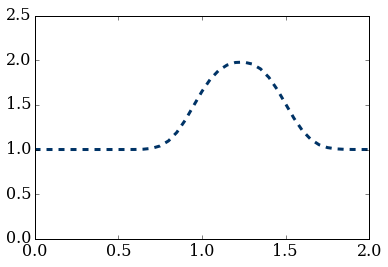

In [281]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);
pyplot.xlim(0,max(x));


In [282]:
for n in range(1,nt):  
    un1 = u.copy() 
    for i in range(1,nx): 
    
        un1[i] = un[i]-c*dt/dx*(un[i]-un[i-1])

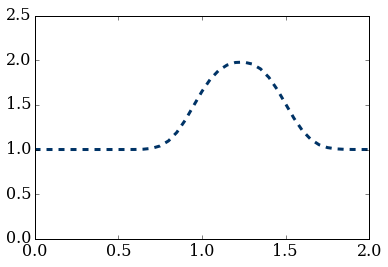

In [283]:
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);
pyplot.xlim(0,max(x));